In [13]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns 


In [14]:
#!pip install seaborn

In [3]:
from pathlib import Path
from dataclasses import dataclass
import yaml


In [4]:
@dataclass(frozen=True)
class DataPreprocessingConfig:
    root_dir: Path
    data_load_path: Path
    local_data_path: Path
    status_file: Path
    all_required_files: list


In [5]:
pwd

'c:\\Users\\RSR\\PYTHON\\LinearRegression\\Research'

In [6]:
os.chdir('c:\\Users\\RSR\\PYTHON\\LinearRegression\\src')

In [7]:
from CancerML.Utils.common import *
from CancerML.Constants import *

In [8]:
class ConfigurationManager:
    def __init__(self,
                 config_filepath=CONFIG_FILE_PATH,
                 params_filepath=PARAMS_FILE_PATH):
        self.config=Read_Yaml(Path("Config/Config.yaml"))
        self.params=Read_Yaml(params_filepath)

        
        create_directories([self.config.artifacts_root])

    def Get_DataPreProcesing_Config(self)->DataPreprocessingConfig:
        config=self.config.data_preprocessing

        create_directories([config.root_dir])

        Data_PreProcessing_config=DataPreprocessingConfig(
            root_dir=config.root_dir,
            data_load_path=config.data_load_path,
            local_data_path=config.local_data_path,
            status_file=config.status_file,
            all_required_files=config.all_required_files
        )
        return Data_PreProcessing_config
    


In [50]:
class DataPreProcessing:
    def __init__(self,config:DataPreprocessingConfig):
        self.config=config
    
    def Check_files(self)->bool:
        file=Path(self.config.data_load_path)
        if file.name  in self.config.all_required_files:
            validation_status=True
            with open(self.config.status_file,'w') as f:
                f.write(f"Validation Status : {validation_status}")
                print(f"file existed : {file.name}")
            
            
        else:
            validation_status=False
            print(validation_status)

        return validation_status
    
    def DataFrame(self):
        file=Path(self.config.data_load_path)
        if file.name in self.config.all_required_files:
            
            df=pd.read_csv(file)
            #print(df.head(1))
            print(df.info())
            
            # ----------------------------------
            # Checking the Missing Values 
            # ----------------------------------
            
            missing_found = False
            
            for i in  df.columns:
                if df[i].isnull().sum()>0:
                    logger.info(f"there are missing values for {i}")
                    #print(f"there are missing values for {i}")
                    missing_found = True
                     

            if not missing_found:
                logger.info(f"There are NO missing values in our DataSet.")
                #print("There are NO missing values in our DataSet.")

            #----------------------------------
            # Checking the Duplicate Values 
            # ---------------------------------
            
            if df.duplicated().sum()==0:
                logger.info(f"There is no Duplicated recoreds in our data set")
            else:
                logger.info(f"Found the few duplciated records in our dataset")
                duplicate_rows = df[df.duplicated()]
                print(duplicate_rows)
            
            #----------------------------------
            # Exploratory Data Analysis 
            # ---------------------------------
            
            logger.info("Histogram:")
            df.hist(figsize=(7, 7))
            plt.show()

            logger.info("-------------- Describe the Histogram -----------------")
            logger.info("\n --------- icavol(Log Cancer Volume) ---------\n 1.Almost normal Distribution \n 2.Good Bell shaped curve \n 3.No Action Needed ")
            logger.info("\n --------- lweight(Log Prostate Weight) ---------\n 1.Normal Distribution \n 2.Already Gaussian-like \n 3.No Action Needed ")
            logger.info("\n --------- age(Patient Age ) ---------\n 1.Slight skew \n 2.Acceptable \n 3.No action needed ")
            logger.info("\n --------- lbph(Log Benign Prostatic Hyperplasia) ---------\n 1.Highly right-skewed \n 2.Long tail, heavy skew \n 3.Yes Action Needed ")
            logger.info("\n --------- svi(Seminal Vesicle Invasion (binary)) ---------\n 1.Binary (0/1) \n 2.Categorical \n 3.No action needed ")
            logger.info("\n --------- lcp(Log Capsular Penetration ) ---------\n 1.Strong right-skew \n 2.Very concentrated at low values \n 3.Yes Action Needed ")
            logger.info("\n --------- gleason(Gleason Score	Clinical  ) ---------\n 1.Discrete small range \n 2.Treat as categorical \n 3.No action needed ")
            logger.info("\n --------- pgg45(% of Gleason patterns 4 or 5 ) ---------\n 1.Extremely right-skewed \n 2.Heavy outliers \n 3.Yes Action Needed ")
            logger.info("\n --------- lpsa(Log Prostate-specific Antigen (PSA)) ---------\n 1.Mild skew (0/1) \n 2.Small skew ok \n 3.Optional action needed ")
            
            logger.info(f" \n------- Linear Regression, you must fix skewness for these features -------- \n ✅ lbph \n ✅ lcp \n ✅ pgg45")
            
            logger.info(f"\n Identifying the which columns having the invalid values")
            cols = ['lbph', 'lcp', 'pgg45']
            for c in cols:
                print(c, df[c].min(), df[c].isnull().sum())
            
            logger.info(f"\n Fix negative and missing values" )  

            for c in ['lbph', 'lcp', 'pgg45']:
                df[c] = df[c].clip(lower=0)
            
            logger.info("\n Filling the NAN values ")
            for c in ['lbph', 'lcp', 'pgg45']:
                df[c] = df[c].fillna(df[c].median())

            df['lbph'] = np.log1p(df['lbph'])
            df['lcp'] = np.log1p(df['lcp'])
            df['pgg45'] = np.log1p(df['pgg45'])

            df.hist(figsize=(7, 7))
            plt.show()

            logger.info(f"\n --------------  HeatMap ----------------------")
            sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
            

        else:
            logger.info(f"Data set does not exist in the source path : please check")
        return df



[2025-12-04 21:47:17,567: INFO: common: YAML loaded successfully: Config\Config.yaml]
[2025-12-04 21:47:17,574: INFO: common: YAML loaded successfully: params.yaml]
[2025-12-04 21:47:17,578: INFO: common: Directory created: artifacts]
[2025-12-04 21:47:17,578: INFO: common: Directory created: artifacts/data_preprocessing]


file existed : cancer_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 7.0 KB
None
[2025-12-04 21:47:17,649: INFO: 2870357156: There are NO missing values in our DataSet.]
[2025-12-04 21:47:17,652: INFO: 2870357156: There is no Duplicated recoreds in our data set]
[2025-12-04 21:47:17,652: INFO: 2870357156: Histogram:]


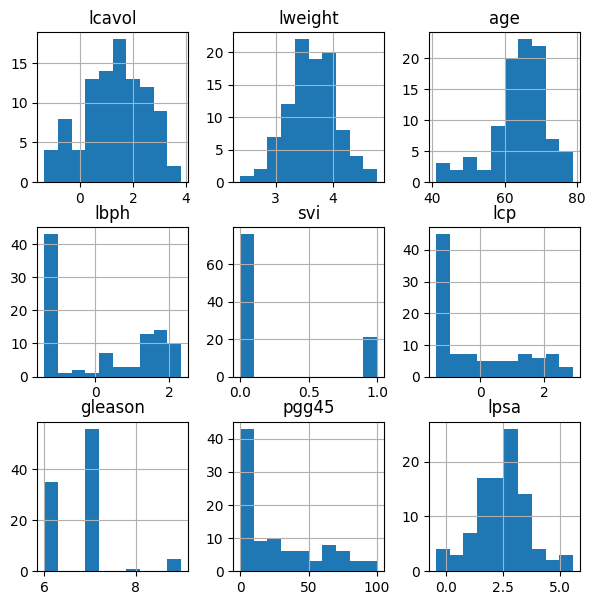

[2025-12-04 21:47:18,620: INFO: 2870357156: -------------- Describe the Histogram -----------------]
[2025-12-04 21:47:18,620: INFO: 2870357156: 
 --------- icavol(Log Cancer Volume) ---------
 1.Almost normal Distribution 
 2.Good Bell shaped curve 
 3.No Action Needed ]
[2025-12-04 21:47:18,620: INFO: 2870357156: 
 --------- lweight(Log Prostate Weight) ---------
 1.Normal Distribution 
 2.Already Gaussian-like 
 3.No Action Needed ]
[2025-12-04 21:47:18,620: INFO: 2870357156: 
 --------- age(Patient Age ) ---------
 1.Slight skew 
 2.Acceptable 
 3.No action needed ]
[2025-12-04 21:47:18,620: INFO: 2870357156: 
 --------- lbph(Log Benign Prostatic Hyperplasia) ---------
 1.Highly right-skewed 
 2.Long tail, heavy skew 
 3.Yes Action Needed ]
[2025-12-04 21:47:18,620: INFO: 2870357156: 
 --------- svi(Seminal Vesicle Invasion (binary)) ---------
 1.Binary (0/1) 
 2.Categorical 
 3.No action needed ]
[2025-12-04 21:47:18,628: INFO: 2870357156: 
 --------- lcp(Log Capsular Penetration 

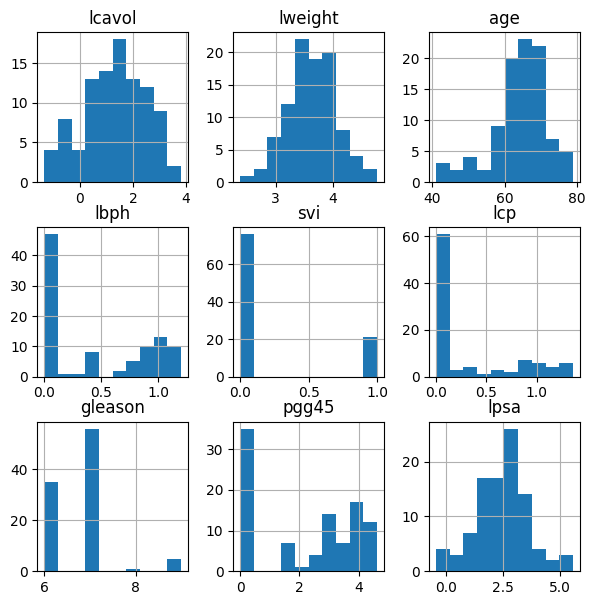

[2025-12-04 21:47:19,606: INFO: 2870357156: 
 --------------  HeatMap ----------------------]


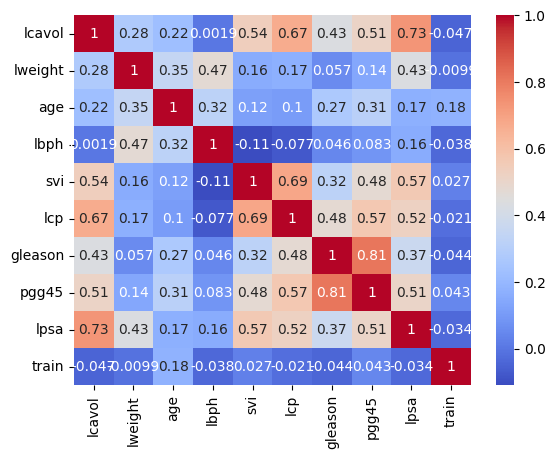

In [51]:
try:
    config=ConfigurationManager()
    data_preprocess=config.Get_DataPreProcesing_Config()
    data_preprocessing=DataPreProcessing(config=data_preprocess)
    check_file=data_preprocessing.Check_files()
    df=data_preprocessing.DataFrame()
    

except Exception as e:
    raise e